# TVS Loan Default Data Analysis

## Install Required Libraries

Before starting, install all necessary Python libraries for data analysis and machine learning. This ensures that the environment has the latest versions of the required packages.

In [57]:
%pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

Let's import all the necessary libraries for data manipulation, visualization, and feature selection. This step ensures that all required modules are available for the subsequent analysis.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.stats import spearmanr

# Show full columns
pd.set_option('display.max_columns', None)


Now that we've imported the required libraries, we're ready to load and explore the dataset in the next step.

## Load and Inspect the Dataset

In this step, we'll load the dataset from a CSV file, assign meaningful column names, and perform an initial inspection. This helps us understand the structure of the data and identify any missing values or data type issues.

In [59]:
# Load CSV directly from same folder
df = pd.read_csv('./TVS.csv')

# Define new column names
new_columns = [
    "Customer_ID",
    "First_EMI_Bounced",
    "Bounces_Last_12_Months",
    "Max_MOB",
    "Total_Bounces_On_Loan",
    "EMI",
    "Loan_Amount",
    "Tenure",
    "Dealer_Code",
    "Product_Code",
    "Advance_EMIs_Paid",
    "Interest_Rate",
    "Gender",
    "Employment_Type",
    "Resident_Type",
    "DOB",
    "Loan_Age_At_Application",
    "Total_Loans",
    "Secured_Loans",
    "Unsecured_Loans",
    "Max_Sanctioned_Amount_Live",
    "New_Loans_Last_3_Months",
    "Total_Secured_Sanctioned_Live",
    "Total_Unsecured_Sanctioned_Live",
    "Max_TwoWheeler_Loan_Amount",
    "Months_Since_Last_Personal_Loan",
    "Months_Since_First_Consumer_Durable_Loan",
    "DPD_30_Last_6_Months",
    "DPD_60_Last_6_Months",
    "DPD_90_Last_3_Months",
    "Tier",
    "Loan_Default"
]

# Rename columns
df.columns = new_columns
# Basic shape and types
print("Shape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Replace 'target' with your actual target column
print("\nTarget Distribution:\n", df['Loan_Default'].value_counts(normalize=True))

Shape of Dataset: (119528, 32)

Missing Values:
 Customer_ID                                      0
First_EMI_Bounced                                0
Bounces_Last_12_Months                           0
Max_MOB                                      34480
Total_Bounces_On_Loan                        34480
EMI                                          34480
Loan_Amount                                  34480
Tenure                                       34480
Dealer_Code                                  34480
Product_Code                                 34480
Advance_EMIs_Paid                            34480
Interest_Rate                                34480
Gender                                       34480
Employment_Type                              34480
Resident_Type                                35397
DOB                                          34480
Loan_Age_At_Application                      34480
Total_Loans                                      0
Secured_Loans                    

C:\Users\psp17\AppData\Local\Temp\ipykernel_26176\2333716700.py:2: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./TVS.csv')


### Dataset Overview

- **Shape of Dataset:**  
  The dataset contains 119,528 rows and 32 columns.

- **Missing Values:**  
  Several columns have a significant number of missing values (e.g., `Max_MOB`, `Total_Bounces_On_Loan`, `EMI`, etc. with 34,480 missing entries). Some columns like `Max_Sanctioned_Amount_Live` have even more missing values. We'll need to address these missing values during data cleaning.

- **Data Types Warning:**  
  There is a warning about mixed data types in columns 9, 12, 13, 14, and 15. This usually happens when a column contains both numbers and strings. We'll need to investigate and possibly convert these columns to the appropriate data types.

- **Target Distribution:**  
  The target variable `Loan_Default` is highly imbalanced:
  - 0 (No Default): 97.81%
  - 1 (Default): 2.19%

  This class imbalance should be considered during model development.

## Identify Numerical and Categorical Features

Next, we'll separate the features into numerical and categorical columns. This distinction is crucial for data preprocessing, as different types of features often require different handling (e.g., scaling for numerical features, encoding for categorical features).

In [60]:
# Separate columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Remove target column
target_col = 'Loan_Default'  # 🔁 Replace if needed
if target_col in num_cols: num_cols.remove(target_col)
if target_col in cat_cols: cat_cols.remove(target_col)

print("\nNumerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)



Numerical Columns: ['Customer_ID', 'First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB', 'Total_Bounces_On_Loan', 'EMI', 'Loan_Amount', 'Tenure', 'Dealer_Code', 'Advance_EMIs_Paid', 'Interest_Rate', 'Loan_Age_At_Application', 'Total_Loans', 'Secured_Loans', 'Unsecured_Loans', 'Max_Sanctioned_Amount_Live', 'New_Loans_Last_3_Months', 'Total_Secured_Sanctioned_Live', 'Total_Unsecured_Sanctioned_Live', 'Max_TwoWheeler_Loan_Amount', 'Months_Since_Last_Personal_Loan', 'Months_Since_First_Consumer_Durable_Loan', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']
Categorical Columns: ['Product_Code', 'Gender', 'Employment_Type', 'Resident_Type', 'DOB', 'Tier']


### Feature Types Identified

- **Numerical Columns:**  
  - Customer_ID, First_EMI_Bounced, Bounces_Last_12_Months, Max_MOB, Total_Bounces_On_Loan, EMI, Loan_Amount, Tenure, Dealer_Code, Advance_EMIs_Paid, Interest_Rate, Loan_Age_At_Application, Total_Loans, Secured_Loans, Unsecured_Loans, Max_Sanctioned_Amount_Live, New_Loans_Last_3_Months, Total_Secured_Sanctioned_Live, Total_Unsecured_Sanctioned_Live, Max_TwoWheeler_Loan_Amount, Months_Since_Last_Personal_Loan, Months_Since_First_Consumer_Durable_Loan, DPD_30_Last_6_Months, DPD_60_Last_6_Months, DPD_90_Last_3_Months

- **Categorical Columns:**  
  - Product_Code, Gender, Employment_Type, Resident_Type, DOB, Tier

The target column (`Loan_Default`) has been excluded from both lists. This separation will help us apply the correct preprocessing steps to each feature type in the following stages.


## Data Cleaning and Feature Engineering

In this step, we perform several essential data cleaning and feature engineering operations to prepare the dataset for analysis and modeling.

---

### Steps Performed

1. **Drop `Customer_ID` Column**
   - The `Customer_ID` column, which serves only as a unique identifier, is removed from the dataset as it does not provide predictive value.

2. **Convert `Dealer_Code` to Categorical**
   - The `Dealer_Code` column is explicitly converted to a string type to ensure it is treated as a categorical variable in subsequent analysis.

3. **Convert `DOB` to Age**
   - The `DOB` (Date of Birth) column is converted to datetime format.
   - A new `Age` column is created by calculating the difference (in years) between the current date and the date of birth.
   - The original `DOB` column is then dropped, as age is a more useful feature for modeling.

   > **Note:**  
   > A warning was generated during date parsing, indicating that the date format may be ambiguous. If your dates are in `day-month-year` format, consider specifying `dayfirst=True` in `pd.to_datetime()` for more accurate conversion.

4. **Drop Features with More Than 70% Missing Values**
   - Columns with more than 70% missing data are dropped from the dataset to avoid introducing bias or noise.
   - The following columns were removed:
     - `Total_Secured_Sanctioned_Live`
     - `Total_Unsecured_Sanctioned_Live`
     - `Months_Since_Last_Personal_Loan`
     - `Months_Since_First_Consumer_Durable_Loan`

5. **Fill Remaining Missing Values**
   - **Numerical columns:** Missing values are filled with the median of each column.
   - **Categorical columns:** Missing values are filled with the string `'Missing'`.

---



In [61]:
# --- Step 1: Drop Customer_ID if it exists ---
if 'Customer_ID' in df.columns:
    df.drop('Customer_ID', axis=1, inplace=True)
    if 'Customer_ID' in num_cols:
        num_cols.remove('Customer_ID')

# --- Step 2: Convert Dealer_Code to categorical if it exists ---
if 'Dealer_Code' in df.columns:
    df['Dealer_Code'] = df['Dealer_Code'].astype(str)
    if 'Dealer_Code' not in cat_cols:
        cat_cols.append('Dealer_Code')
    if 'Dealer_Code' in num_cols:
        num_cols.remove('Dealer_Code')

# --- Step 3: Convert DOB to Age if it exists ---
if 'DOB' in df.columns:
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
    df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
    df.drop('DOB', axis=1, inplace=True)
    if 'DOB' in cat_cols:
        cat_cols.remove('DOB')
    if 'Age' not in num_cols:
        num_cols.append('Age')

# --- Step 4: Drop features with >70% missing ---
threshold = 0.7
missing_ratio = df.isnull().sum() / len(df)
to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
df.drop(columns=to_drop, inplace=True)
print("Dropped columns with >70% missing:", to_drop)

# Update column lists
num_cols = [col for col in num_cols if col in df.columns]
cat_cols = [col for col in cat_cols if col in df.columns]

# --- Step 5: Fill missing values safely ---
# Fill numeric
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical only on columns that still exist
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Missing')


C:\Users\psp17\AppData\Local\Temp\ipykernel_26176\3349965331.py:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


Dropped columns with >70% missing: ['Total_Secured_Sanctioned_Live', 'Total_Unsecured_Sanctioned_Live', 'Months_Since_Last_Personal_Loan', 'Months_Since_First_Consumer_Durable_Loan']


### Output Summary

- **Dropped columns with >70% missing:**  
  - `Total_Secured_Sanctioned_Live`
  - `Total_Unsecured_Sanctioned_Live`
  - `Months_Since_Last_Personal_Loan`
  - `Months_Since_First_Consumer_Durable_Loan`

- **Date Parsing Warning:**  
  - A warning was issued regarding the date format in the `DOB` column. Double-check your date format and adjust the parsing parameters if necessary.

---

These cleaning and transformation steps ensure that the dataset is ready for further exploration, feature selection, and modeling.

## Data Cleaning Results and Feature Overview

After completing the data cleaning and feature engineering steps, let's review the current state of the dataset.

---

In [62]:
print("Remaining missing values:", df.isnull().sum().sum())
print("Final shape:", df.shape)
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)


Remaining missing values: 0
Final shape: (119528, 27)
Numerical columns: ['First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB', 'Total_Bounces_On_Loan', 'EMI', 'Loan_Amount', 'Tenure', 'Advance_EMIs_Paid', 'Interest_Rate', 'Loan_Age_At_Application', 'Total_Loans', 'Secured_Loans', 'Unsecured_Loans', 'Max_Sanctioned_Amount_Live', 'New_Loans_Last_3_Months', 'Max_TwoWheeler_Loan_Amount', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months', 'Age']
Categorical columns: ['Product_Code', 'Gender', 'Employment_Type', 'Resident_Type', 'Tier', 'Dealer_Code']


### Output Summary

- **Remaining Missing Values:**  
  All missing values have been successfully handled. There are now **0 missing values** in the dataset.

- **Final Shape of the Dataset:**  
  - **Rows:** 119,528  
  - **Columns:** 27

---

### Updated Feature Lists

- **Numerical Columns:**  
  - First_EMI_Bounced
  - Bounces_Last_12_Months
  - Max_MOB
  - Total_Bounces_On_Loan
  - EMI
  - Loan_Amount
  - Tenure
  - Advance_EMIs_Paid
  - Interest_Rate
  - Loan_Age_At_Application
  - Total_Loans
  - Secured_Loans
  - Unsecured_Loans
  - Max_Sanctioned_Amount_Live
  - New_Loans_Last_3_Months
  - Max_TwoWheeler_Loan_Amount
  - DPD_30_Last_6_Months
  - DPD_60_Last_6_Months
  - DPD_90_Last_3_Months
  - Age

- **Categorical Columns:**  
  - Product_Code
  - Gender
  - Employment_Type
  - Resident_Type
  - Tier
  - Dealer_Code

---

The dataset is now fully cleaned, with all missing values addressed and features properly categorized. This prepares the data for further analysis, feature selection, and modeling.

## Finalize Categorical Feature List

To ensure there are no duplicate entries in our list of categorical columns, we remove any duplicates and display the final set of categorical features.

---

In [63]:
# Remove duplicates in cat_cols
cat_cols = list(set(cat_cols))
print("✅ Final categorical columns:", cat_cols)

✅ Final categorical columns: ['Resident_Type', 'Dealer_Code', 'Product_Code', 'Tier', 'Employment_Type', 'Gender']


### Output

- **Final categorical columns:**  
  - Resident_Type
  - Dealer_Code
  - Product_Code
  - Tier
  - Employment_Type
  - Gender

---

With this, our list of categorical columns is clean and ready for encoding or further analysis.

## Visual Exploration of Numeric Distributions and Outliers

To better understand the distribution and potential outliers in each numerical feature, we visualize both the histogram and boxplot for every numeric column in the dataset.

---

### What This Step Does

- **Histograms:**  
  Show the overall distribution, skewness, and modality of each numeric variable.
- **Boxplots:**  
  Highlight the presence of outliers, spread, and central tendency.

---

### How to Interpret the Plots

- **Histogram:**  
  - *Symmetric distribution* suggests normality.
  - *Skewed distribution* (left or right) may indicate the need for transformation.
  - *Multiple peaks* can suggest subpopulations or data issues.

- **Boxplot:**  
  - *Dots or points outside the whiskers* are potential outliers.
  - *Long whiskers* indicate high variability or extreme values.

---

### Why This Matters

- **Outlier Detection:**  
  Outliers can distort model training and statistical summaries. Identifying them visually is the first step toward deciding whether to cap, transform, or remove them.

- **Distribution Understanding:**  
  Knowing the shape of each variable helps in choosing the right preprocessing and modeling techniques (e.g., normalization, log transformation).

---

### Next Steps

- Review the plots for each numeric feature.
- Note any variables with significant skewness or outliers.
- Decide on appropriate outlier treatment and transformation strategies in subsequent steps.

---


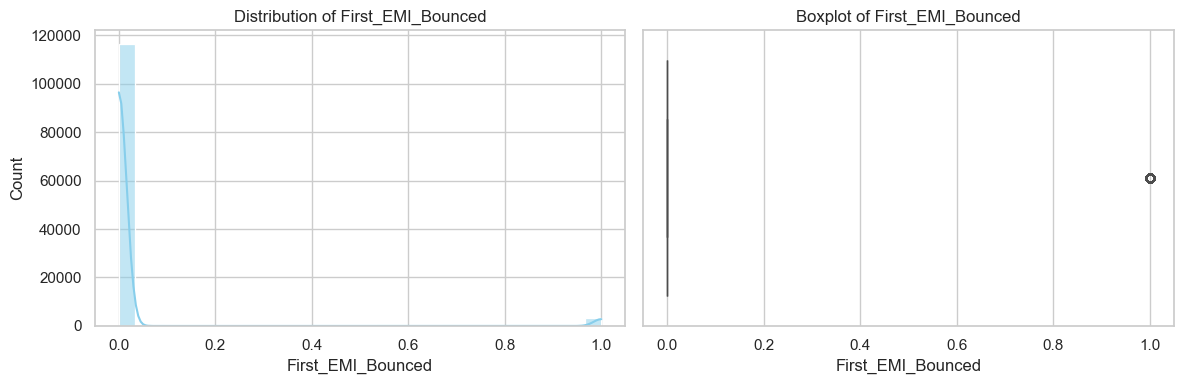

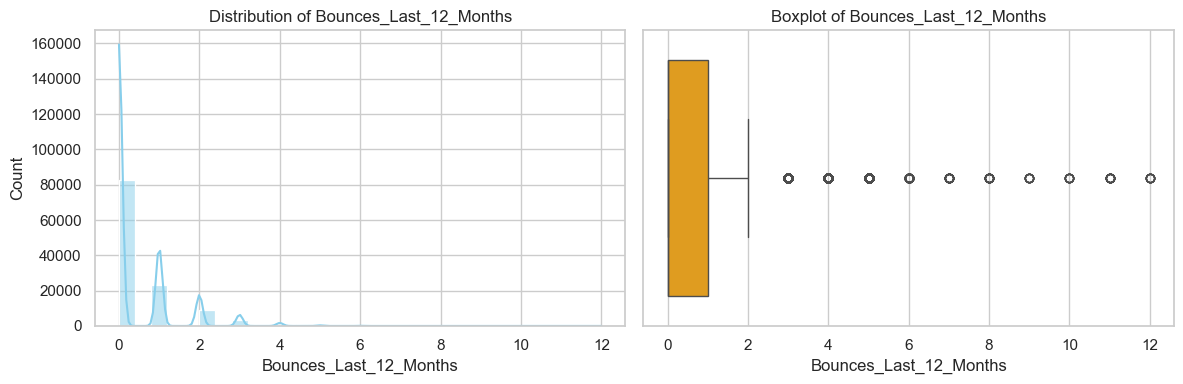

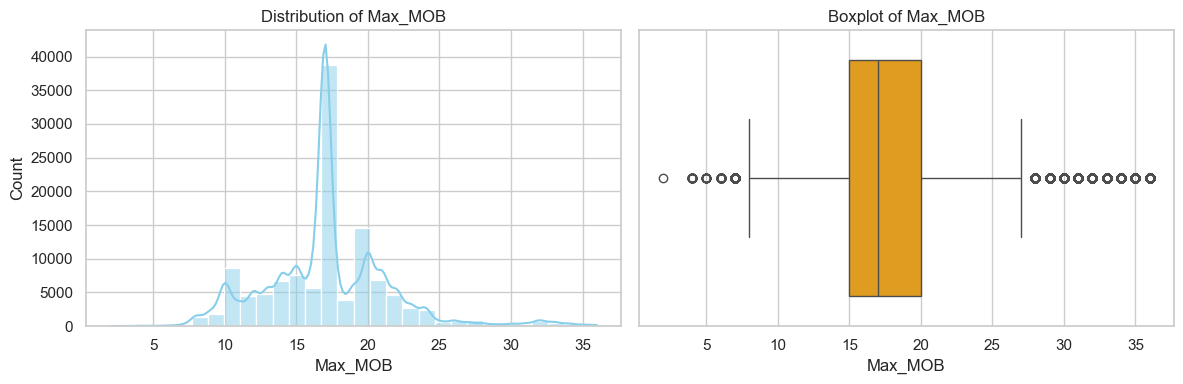

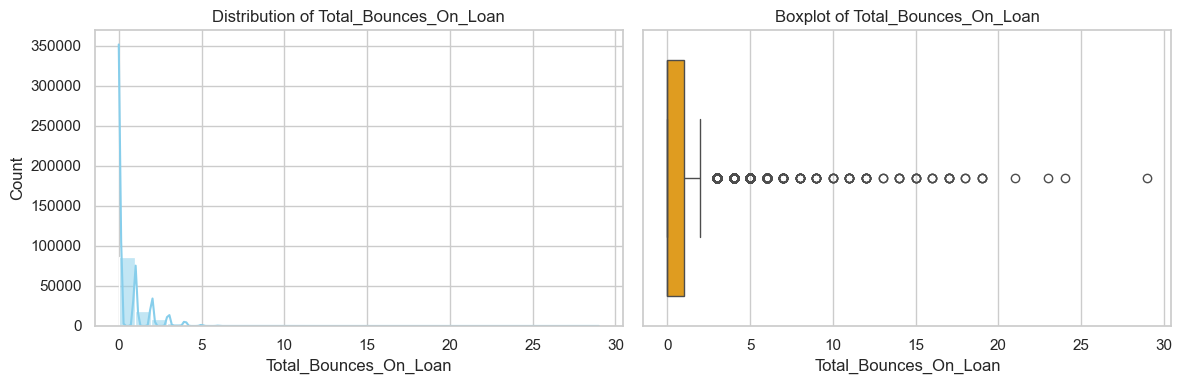

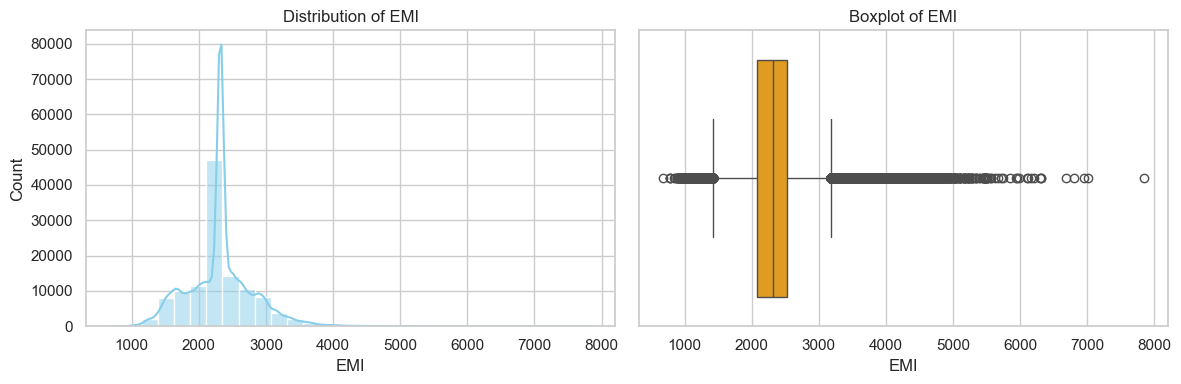

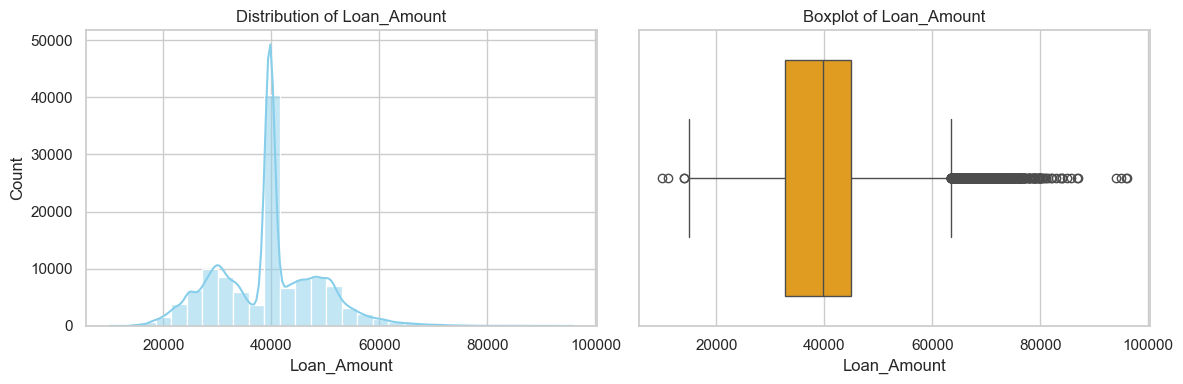

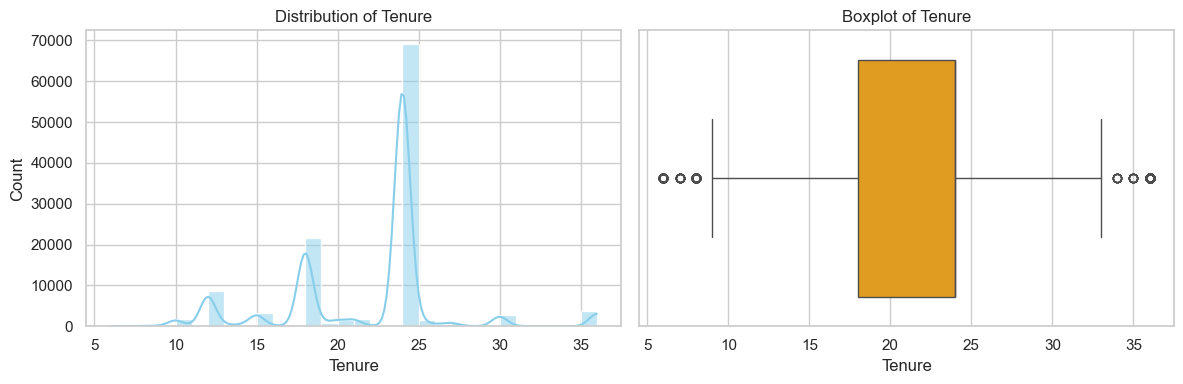

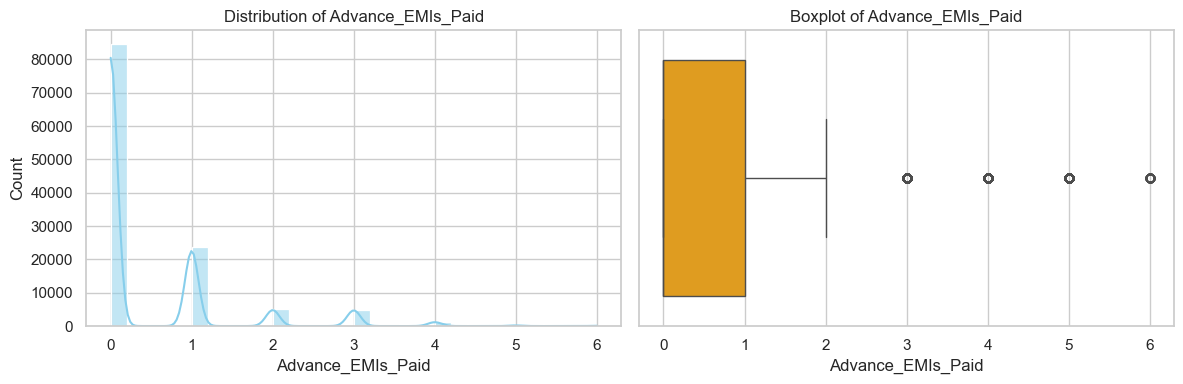

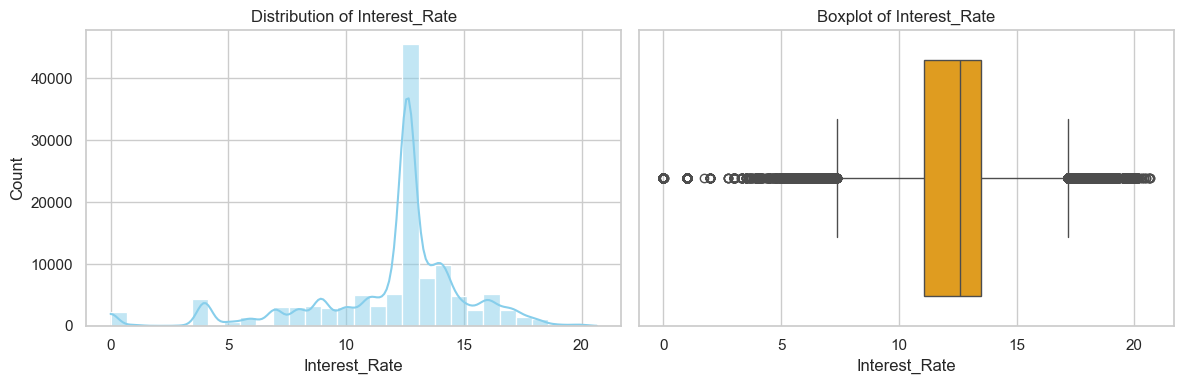

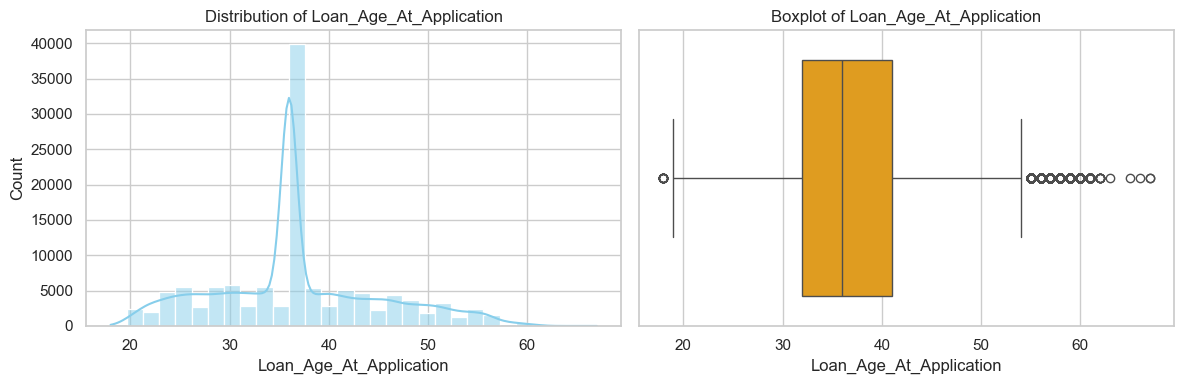

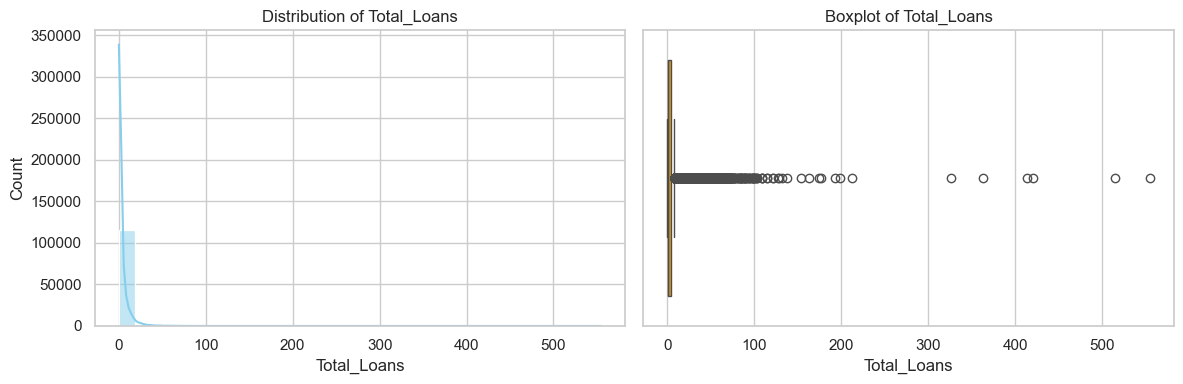

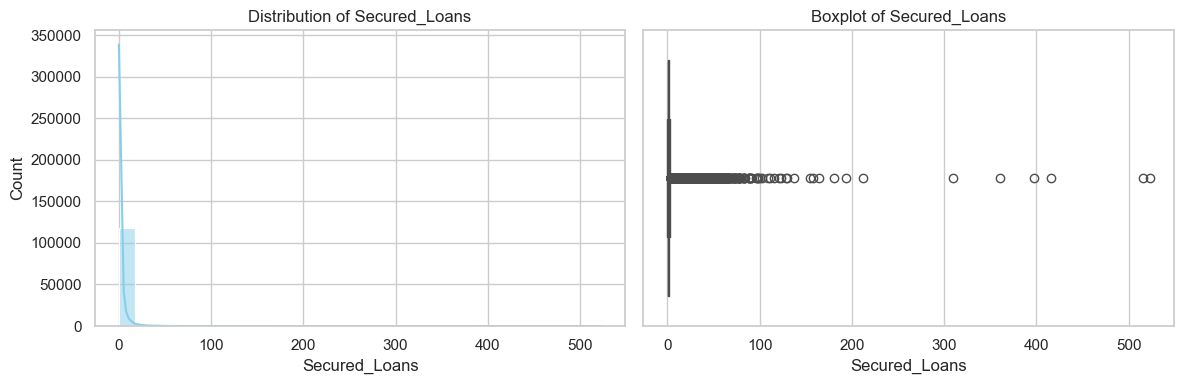

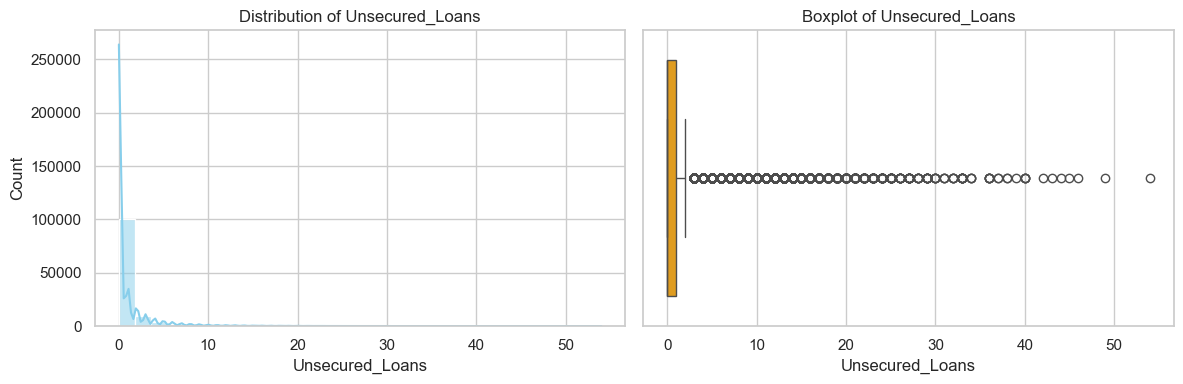

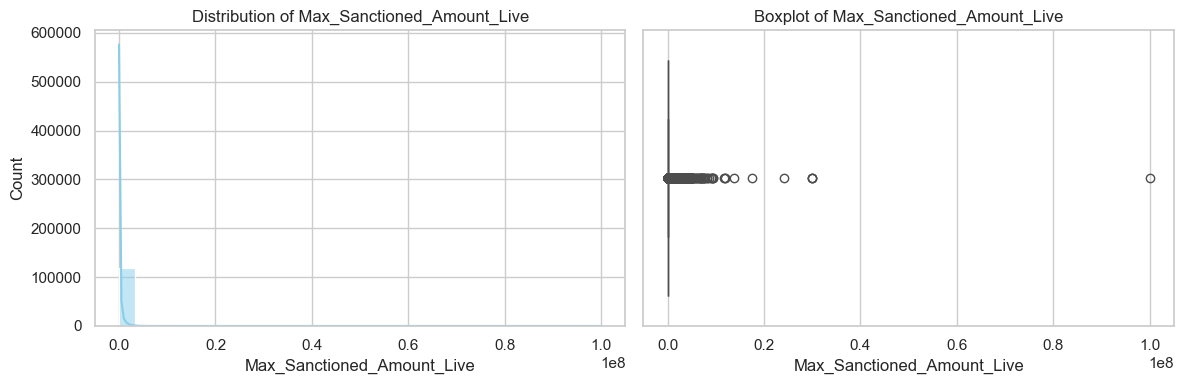

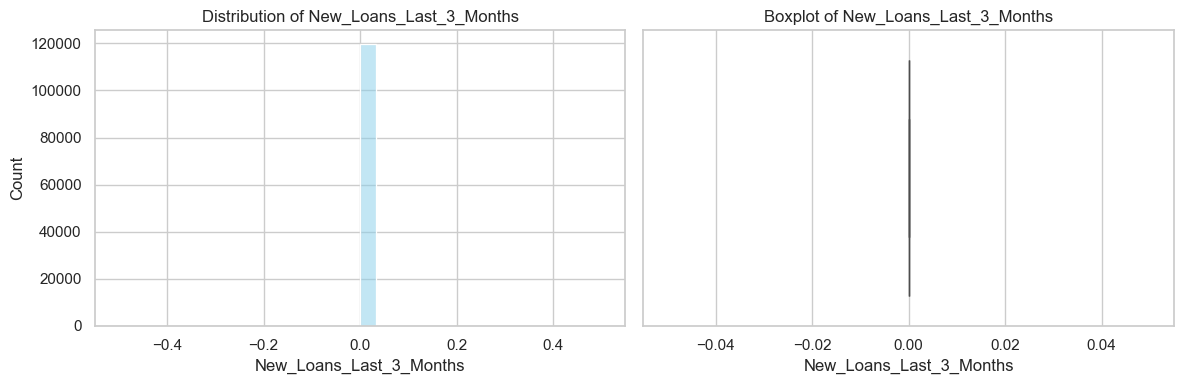

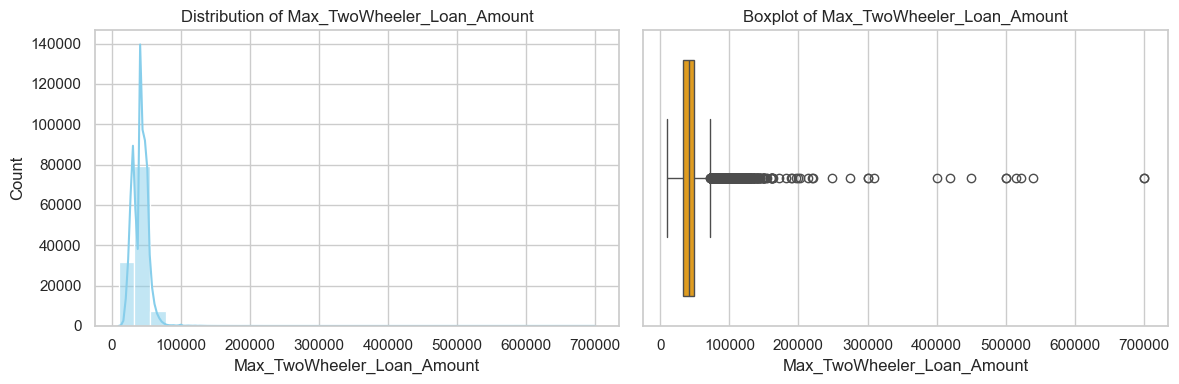

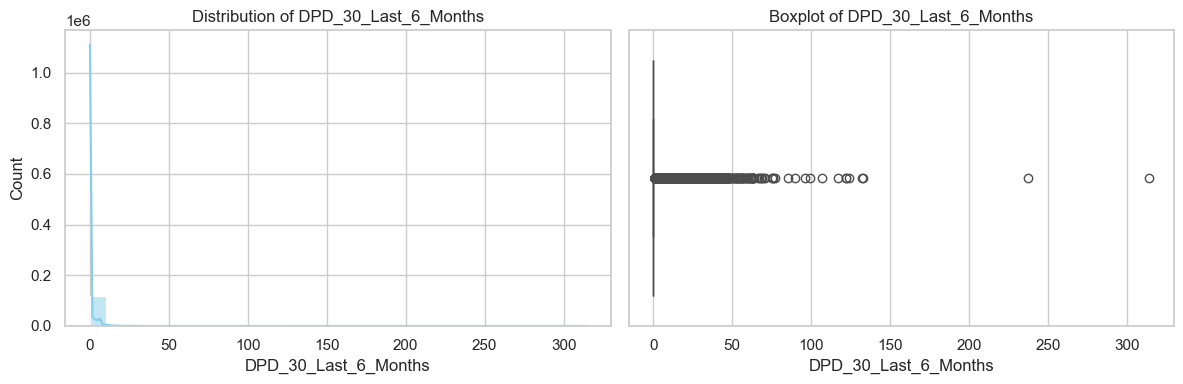

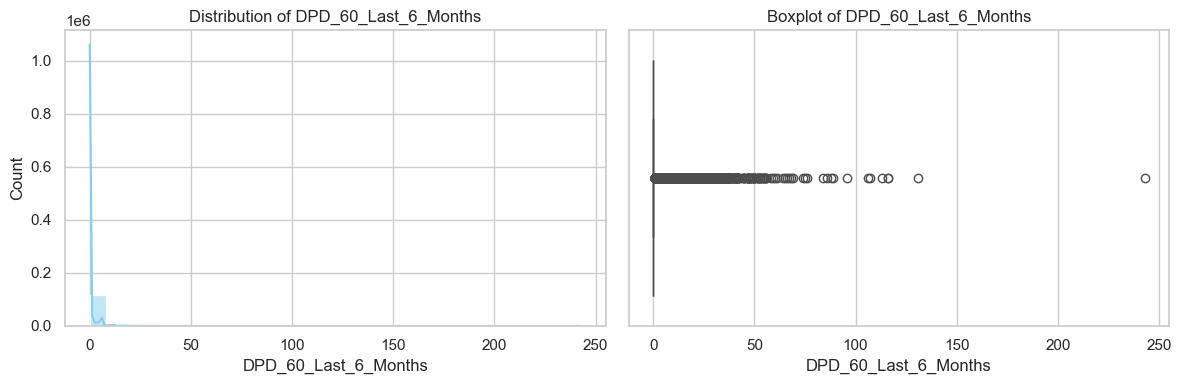

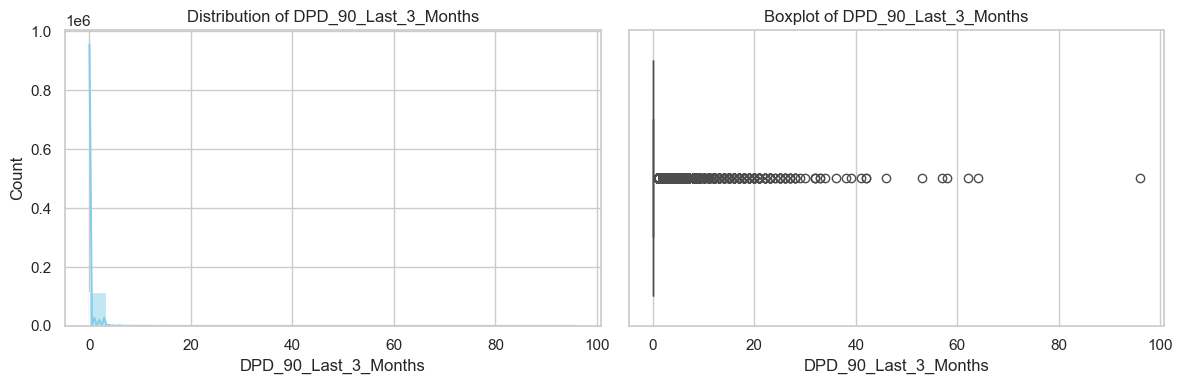

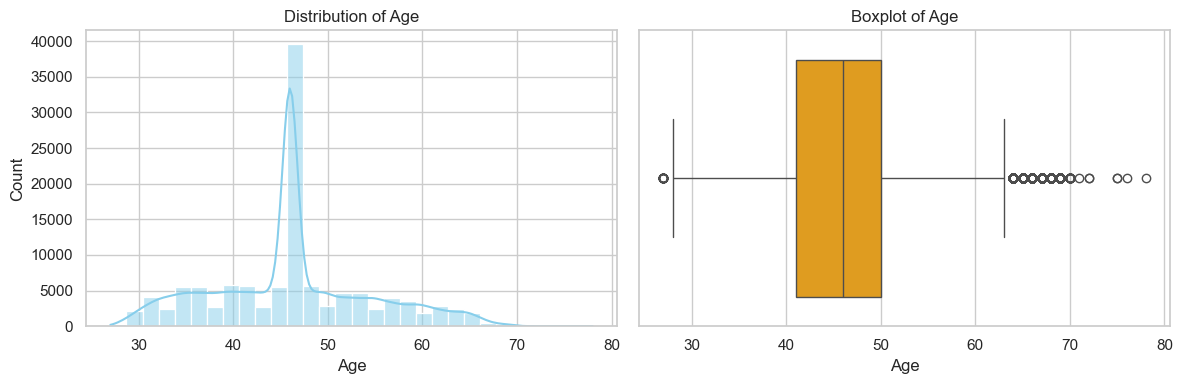

In [64]:
# Visual scan for numeric distributions + outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram and boxplot side-by-side for all numeric columns
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

## Outlier Treatment: IQR Capping (Winsorization)

To address the presence of extreme values identified in the previous visualizations, we apply **IQR-based capping (Winsorization)** to selected numeric columns. This process helps to reduce the influence of outliers without removing data points, making the dataset more robust for modeling.

---

### Steps Performed

1. **Data Copy:**  
   - Created a copy of the original dataframe (`df_winsor`) to preserve the raw data.

2. **Selected Columns for Capping:**  
   - Outlier capping was applied to the following columns:
     - `First_EMI_Bounced`
     - `Max_Sanctioned_Amount_Live`
     - `DPD_30_Last_6_Months`
     - `DPD_60_Last_6_Months`
     - `DPD_90_Last_3_Months`

3. **IQR Capping Method:**  
   - For each selected column:
     - Calculated the first quartile (Q1) and third quartile (Q3).
     - Computed the interquartile range (IQR = Q3 - Q1).
     - Determined lower and upper bounds as:
       - Lower Bound = Q1 - 1.5 × IQR
       - Upper Bound = Q3 + 1.5 × IQR
     - Values below the lower bound were set to the lower bound.
     - Values above the upper bound were set to the upper bound.

---

### Why This Matters

- **Reduces the impact of extreme values** that could skew model training and evaluation.
- **Preserves the overall structure** of the data by capping rather than removing outliers.
- **Improves model robustness** and generalization, especially for algorithms sensitive to outliers.

---

In [65]:
# Copy to avoid altering original
df_winsor = df.copy()

# Columns to cap
outlier_cols = ['First_EMI_Bounced', 'Max_Sanctioned_Amount_Live', 
                'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']

# Apply IQR capping
for col in outlier_cols:
    Q1 = df_winsor[col].quantile(0.25)
    Q3 = df_winsor[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_winsor[col] = np.where(df_winsor[col] < lower_bound, lower_bound, df_winsor[col])
    df_winsor[col] = np.where(df_winsor[col] > upper_bound, upper_bound, df_winsor[col])

print("✅ Outlier capping applied to:", outlier_cols)


✅ Outlier capping applied to: ['First_EMI_Bounced', 'Max_Sanctioned_Amount_Live', 'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']


### Output

- Outlier capping has been successfully applied to the specified columns.
- The dataset (`df_winsor`) is now ready for further analysis, feature engineering, or modeling with reduced influence from extreme values.

---

## Visualizing the Effect of Outlier Capping

To assess the impact of IQR-based capping (Winsorization) on the selected numeric features, we compare the boxplots of each column before and after capping. This visual comparison helps confirm that extreme values have been effectively limited, reducing their influence on subsequent analyses and modeling.

---

### What This Step Does

- **Side-by-Side Boxplots:**  
  For each outlier-capped column, two boxplots are displayed:
  - **Before Capping:** Shows the original distribution, highlighting the presence and extent of outliers.
  - **After Capping:** Shows the distribution after applying IQR capping, with extreme values limited to the calculated bounds.

---

### How to Interpret the Plots

- **Before Capping:**  
  - Outliers appear as points or extended whiskers far from the box.
  - The spread may be large, indicating high variability.

- **After Capping:**  
  - Whiskers are shortened, and extreme points are brought within the IQR bounds.
  - The central box (interquartile range) remains, but the influence of outliers is reduced.

---

### Why This Matters

- **Confirms Outlier Treatment:**  
  Visual evidence that capping has successfully limited extreme values.
- **Improves Data Quality:**  
  Reduces the risk of outliers distorting model training and statistical summaries.
- **Supports Robust Analysis:**  
  Ensures that subsequent analyses and models are less sensitive to rare, extreme data points.

---

*Reviewing these plots to ensure that the capping process has worked as intended. If any variable still shows problematic outliers, have to consider further investigation or alternative treatments before proceeding.*


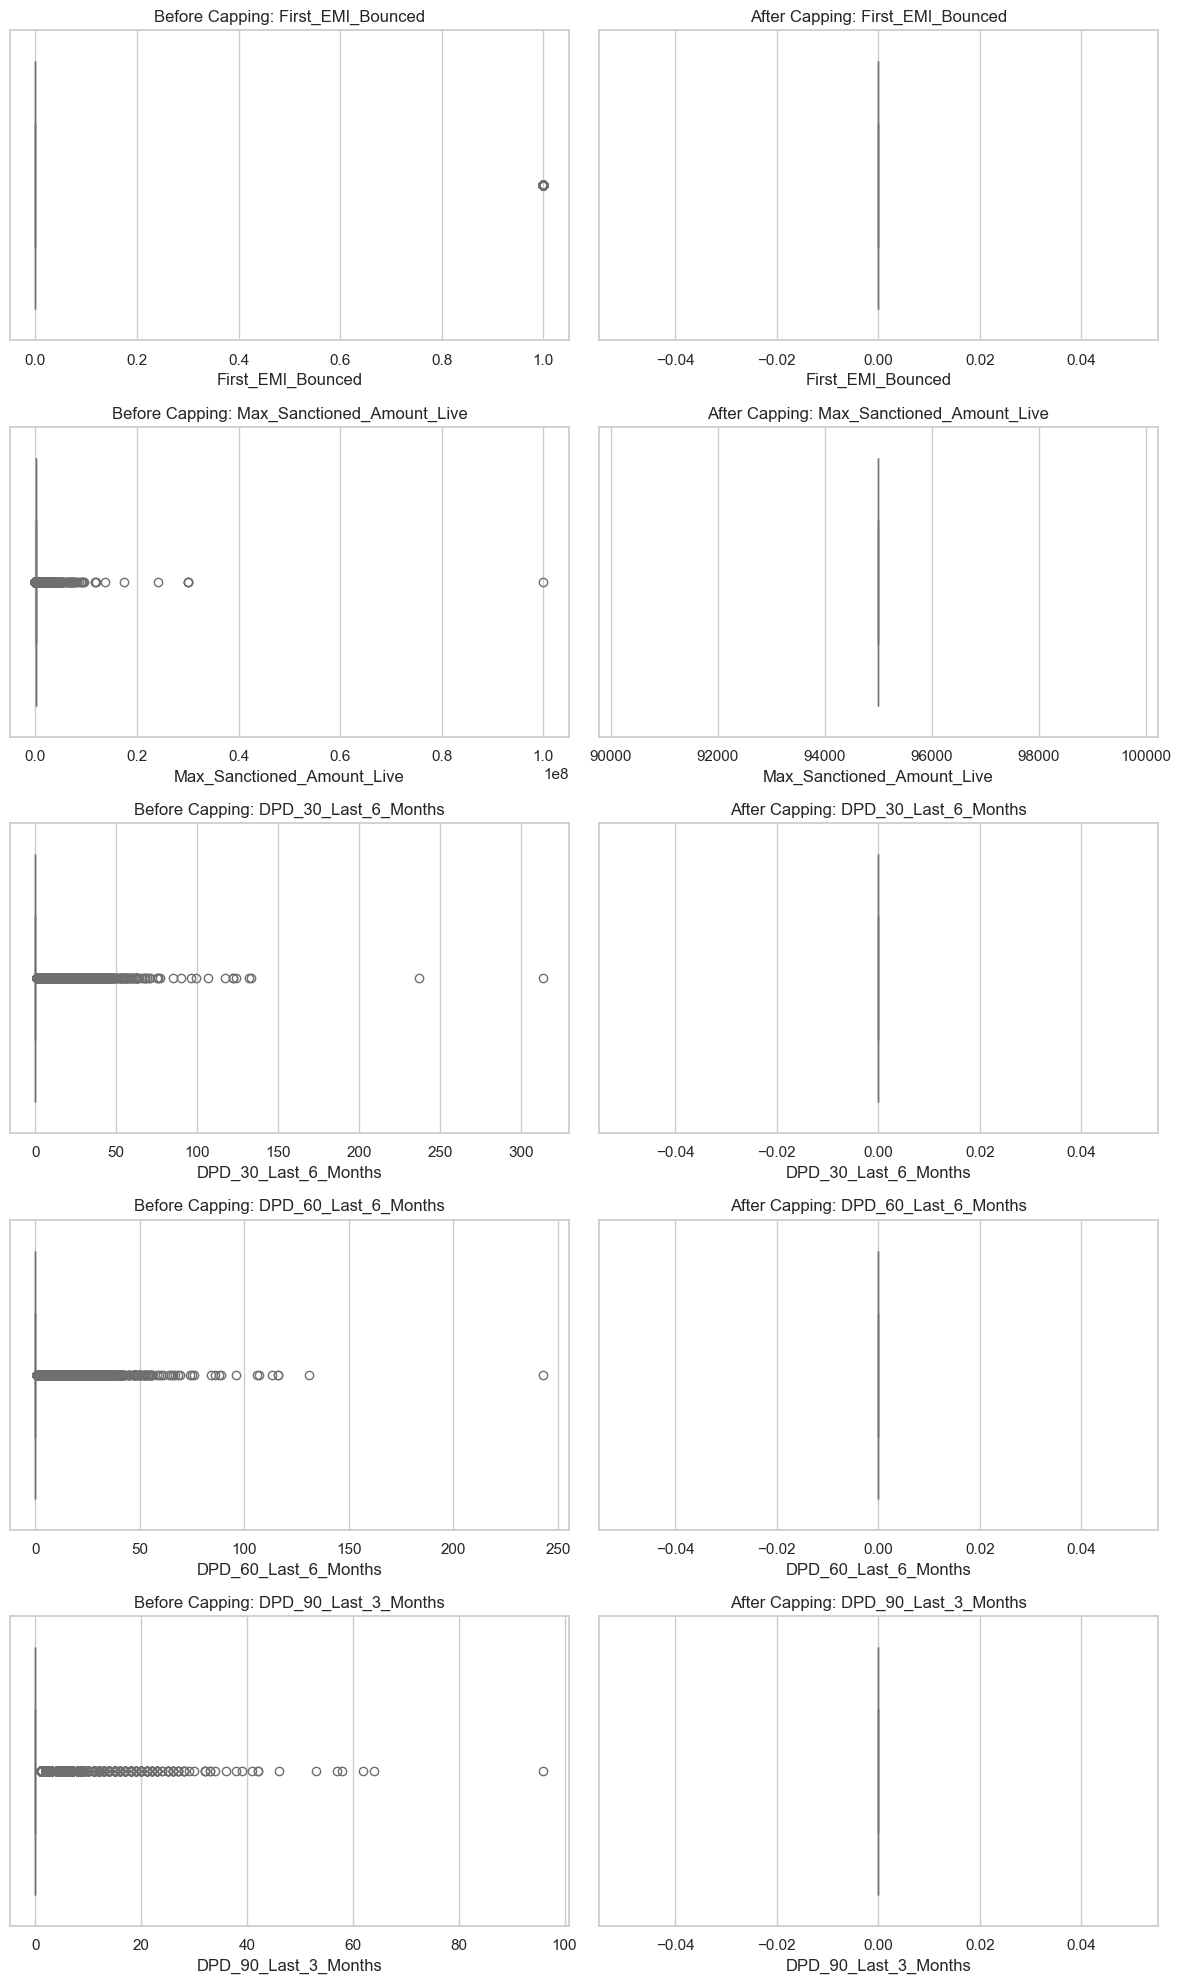

In [66]:
# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(outlier_cols), ncols=2, figsize=(12, 4 * len(outlier_cols)))

for i, col in enumerate(outlier_cols):
    # Original
    sns.boxplot(x=df[col], ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Before Capping: {col}')
    
    # Capped
    sns.boxplot(x=df_winsor[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'After Capping: {col}')

plt.tight_layout()
plt.show()


## Encode Categorical Features for Exploratory Data Analysis (EDA)

To facilitate numerical analysis and visualization, we encode the categorical features using Label Encoding. This step converts each category into a unique integer, making it easier to work with these features in statistical and machine learning methods.

---

In [67]:
# Encode categorical features for EDA
df_encoded = df.copy()
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

print("Encoded categorical columns:", df_encoded[cat_cols].head())

Encoded categorical columns:    Resident_Type  Dealer_Code  Product_Code  Tier  Employment_Type  Gender
0              2          280             4     0                0       0
1              3         1439             1     0                4       1
2              3          249             4     0                4       1
3              3          271             4     0                3       0
4              3         2506             0     0                3       1


### What was done:
- Created a copy of the original dataframe to preserve raw data.
- Applied `LabelEncoder` to each categorical column.
- Stored each encoder in a dictionary (`le_dict`) for potential inverse transformations later.

---
The encoded dataframe (`df_encoded`) is now ready for numerical analysis and visualization.

## Categorical Distribution by Loan Default Status

To further explore the relationship between key features and loan default status, we visualize the count distributions of selected variables, split by the `Loan_Default` target. This approach helps identify whether certain values or categories are more prevalent among defaulted or non-defaulted loans.

---

### What This Step Does

- **Selected Features:**
  - `First_EMI_Bounced`
  - `Max_Sanctioned_Amount_Live`
  - `DPD_30_Last_6_Months`
  - `DPD_60_Last_6_Months`
  - `DPD_90_Last_3_Months`

- **Visualization Approach:**
  - For each feature, a countplot is generated showing the frequency of each value, with bars colored by loan default status (`Loan_Default`).
  - This allows for a direct comparison of how the distribution of each feature differs between defaulted and non-defaulted loans.

---

### How to Interpret the Plots

- **Bar Heights:**  
  The height of each bar represents the number of loans with a given feature value, split by default status.
- **Color Coding:**  
  Different colors represent defaulted and non-defaulted loans, making it easy to spot imbalances or trends.
- **Feature Discrimination:**  
  If certain values are much more common in one class than the other, the feature may be useful for predicting default risk.

---

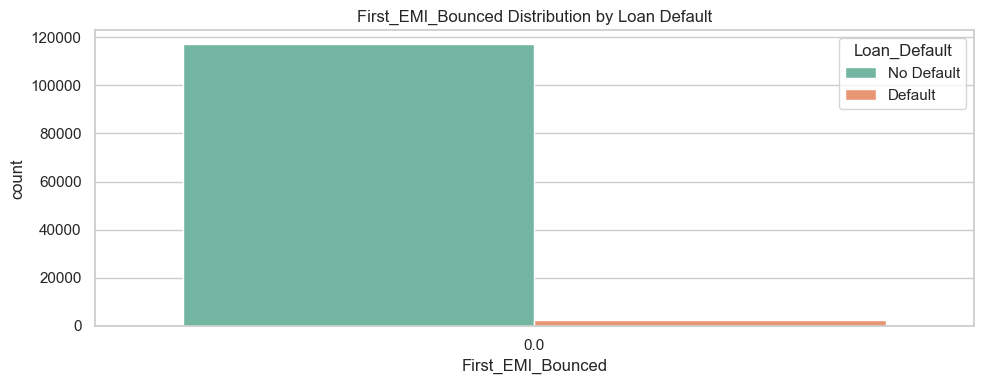

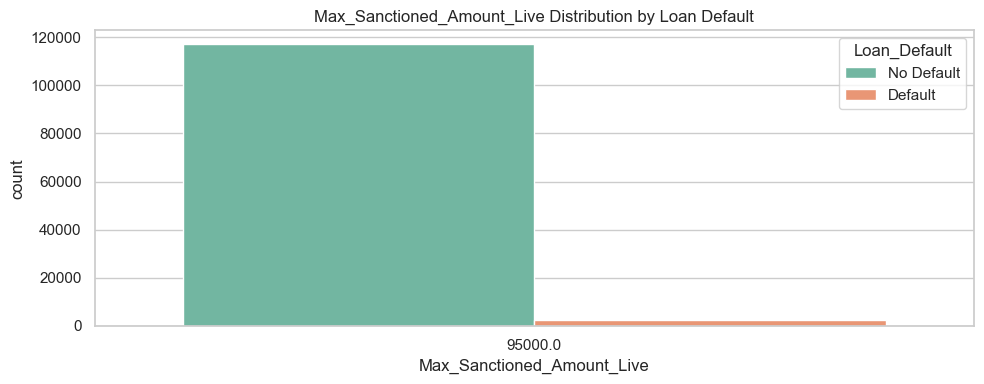

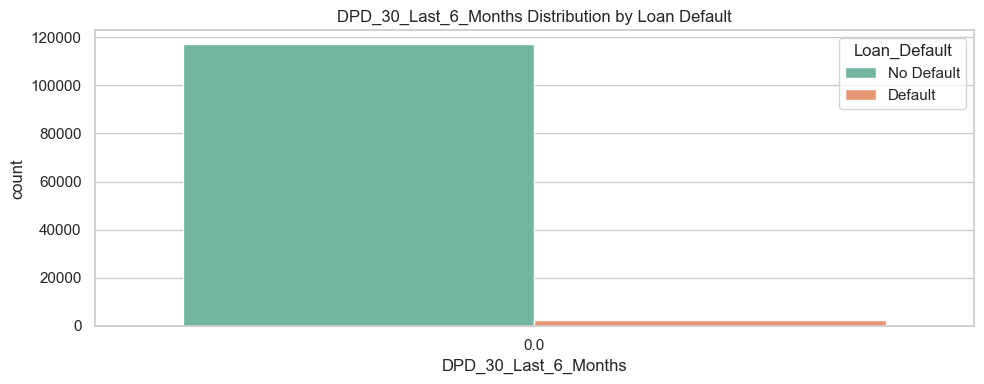

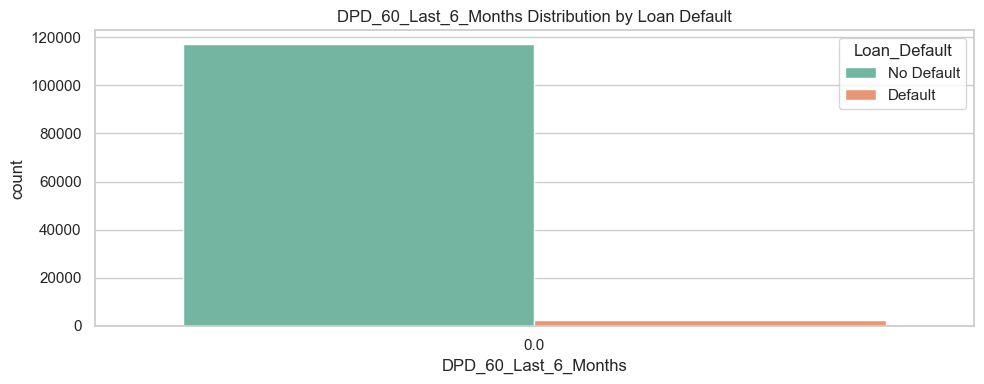

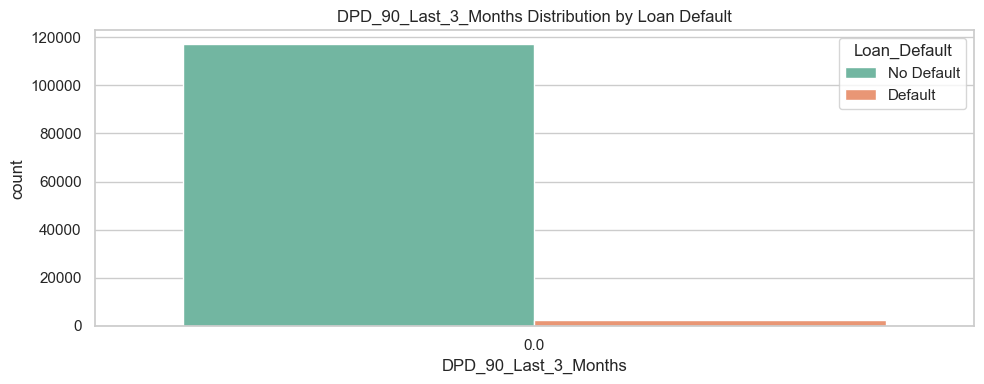

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the winsorized dataframe
cols_to_plot = ['First_EMI_Bounced', 'Max_Sanctioned_Amount_Live',
                'DPD_30_Last_6_Months', 'DPD_60_Last_6_Months', 'DPD_90_Last_3_Months']

for col in cols_to_plot:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_winsor, x=col, hue='Loan_Default', palette='Set2')
    plt.title(f'{col} Distribution by Loan Default')
    plt.legend(title='Loan_Default', labels=['No Default', 'Default'])
    plt.tight_layout()
    plt.show()


### Example Output

By taking a look at the countplot for `First_EMI_Bounced`:

- The plot shows the count of loans for each value of `First_EMI_Bounced`, separated by default status.
- If the vast majority of both defaulted and non-defaulted loans have the same value (e.g., 0), this feature may have limited predictive power on its own.

---

### Why This Matters

- **Feature Selection:**  
  Countplots help identify which features and values are associated with higher default risk, guiding further feature engineering and model development.
- **Business Insights:**  
  Understanding the distribution of key features by default status can inform risk management strategies and policy decisions.

---

*Review the countplots for all selected features to identify any clear differences between defaulted and non-defaulted loans. These insights will support more informed modeling and business decisions.*

## Prepare Data for Modeling and Define Gini Score

In this step, we set up the data for model training and evaluation, and define a custom Gini score function—a common metric for assessing model performance in imbalanced classification problems.

---

### Steps Performed

1. **Import Required Libraries**
   - Imported essential modules for modeling, evaluation, and data splitting:
     - `LogisticRegression` for building a baseline model.
     - `roc_auc_score` for calculating the Area Under the ROC Curve (AUC).
     - `train_test_split` for splitting the data into training and testing sets.
     - `deepcopy` and `numpy` for data manipulation and copying.

2. **Prepare Features and Target**
   - `X`: All features except the target (`Loan_Default`).
   - `y`: The target variable (`Loan_Default`).

3. **Train-Test Split**
   - Split the data into training and testing sets using an 80/20 ratio.
   - Used stratified sampling to maintain the class distribution in both sets.
   - Set a random seed (`random_state=42`) for reproducibility.

4. **Define Gini Score Function**
   - Created a function `gini_score` that computes the Gini coefficient based on the ROC AUC score:
     - \( \text{Gini} = 2 \times \text{AUC} - 1 \)
   - The Gini coefficient is widely used in credit risk modeling to measure discriminatory power.

---

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from copy import deepcopy
import numpy as np

# Setup data
X = df_encoded.drop('Loan_Default', axis=1)
y = df_encoded['Loan_Default']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE on training data only
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Gini Score Function
def gini_score(y_true, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba)
    return 2 * auc - 1


The data is now ready for model training and evaluation, with a custom Gini score function defined for performance measurement.

## Baseline Model: Logistic Regression with Feature Scaling

In this step, we build a baseline predictive model using logistic regression, incorporating feature scaling to ensure all features contribute equally to the model.

---

### Steps Performed

1. **Import Required Modules**
   - Imported `StandardScaler` for feature scaling.
   - Imported `make_pipeline` to streamline preprocessing and modeling.

2. **Pipeline Construction**
   - Created a pipeline that first scales all features using `StandardScaler`, then fits a logistic regression model (`max_iter=1000` for convergence).

3. **Model Training and Prediction**
   - Trained the pipeline on the training data.
   - Predicted the probability of default for the test set.

4. **Performance Evaluation**
   - Calculated the Gini score using the previously defined `gini_score` function.

---

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Scale + Train logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train_bal, y_train_bal)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
baseline_gini = gini_score(y_test, y_pred_proba)

print(f"🚀 Baseline Gini Score with all features (scaled): {baseline_gini:.4f}")


🚀 Baseline Gini Score with all features (scaled): 0.4811


### Output

- **Baseline Gini Score with all features (scaled):**  
  **0.4811**

---

This baseline Gini score provides a reference point for evaluating the impact of future feature selection, engineering, or model improvements.


## Feature Importance via Gini Drop Analysis

In this step, we assess the importance of each feature by measuring the change in Gini score when each feature is individually removed from the model. This helps identify which features contribute most to the model's predictive power.

---

### Methodology

- For each feature, we:
  - Remove the feature from the dataset.
  - Retrain the logistic regression model (with scaling) on the remaining features.
  - Calculate the Gini score on the test set.
  - Compute the difference (`Gini_Drop`) between the baseline Gini and the new Gini score.
- Features are then sorted by the smallest Gini drop, indicating the least impact on model performance when dropped.

---

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: One-time train-test split on original data
X = df_encoded.drop('Loan_Default', axis=1)
y = df_encoded['Loan_Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Step 3: Run feature-wise Gini drop analysis
feature_gini_drop = []

for feature in X.columns:
    # Drop feature from training and test data
    X_train_temp = pd.DataFrame(X_train_bal, columns=X.columns).drop(columns=[feature])
    X_test_temp = pd.DataFrame(X_test, columns=X.columns).drop(columns=[feature])
    
    # Train model on balanced data
    pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
    pipe.fit(X_train_temp, y_train_bal)
    
    # Predict on original (imbalanced) test data
    y_pred_temp = pipe.predict_proba(X_test_temp)[:, 1]
    
    # Calculate Gini
    gini = gini_score(y_test, y_pred_temp)
    delta = baseline_gini - gini
    feature_gini_drop.append((feature, gini, delta))

# Step 4: Create DataFrame of results
drop_df = pd.DataFrame(feature_gini_drop, columns=['Feature', 'Gini_Without', 'Gini_Drop'])
drop_df = drop_df.sort_values(by='Gini_Drop')

# Step 5: Show top 15 least impactful features
print("📉 Features sorted by least Gini impact when dropped:\n")
print(drop_df.head(15))


📉 Features sorted by least Gini impact when dropped:

                   Feature  Gini_Without  Gini_Drop
13           Resident_Type      0.500133  -0.019078
1   Bounces_Last_12_Months      0.498803  -0.017748
11                  Gender      0.497935  -0.016880
0        First_EMI_Bounced      0.494333  -0.013278
24                    Tier      0.491616  -0.010561
3    Total_Bounces_On_Loan      0.491437  -0.010381
4                      EMI      0.488075  -0.007020
5              Loan_Amount      0.486754  -0.005698
6                   Tenure      0.485801  -0.004746
8             Product_Code      0.485795  -0.004739
10           Interest_Rate      0.485287  -0.004231
17         Unsecured_Loans      0.483919  -0.002864
16           Secured_Loans      0.482595  -0.001540
23    DPD_90_Last_3_Months      0.482352  -0.001297
7              Dealer_Code      0.481999  -0.000944


### Top Features with Least Gini Impact When Dropped

| Feature                   | Gini Without | Gini Drop   |
|---------------------------|--------------|-------------|
| Resident_Type             | 0.5001       | -0.0191     |
| Bounces_Last_12_Months    | 0.4988       | -0.0177     |
| Gender                    | 0.4979       | -0.0169     |
| First_EMI_Bounced         | 0.4943       | -0.0133     |
| Tier                      | 0.4916       | -0.0106     |
| Total_Bounces_On_Loan     | 0.4914       | -0.0104     |
| EMI                       | 0.4881       | -0.0070     |
| Loan_Amount               | 0.4868       | -0.0057     |
| Tenure                    | 0.4858       | -0.0047     |
| Product_Code              | 0.4858       | -0.0047     |
| Interest_Rate             | 0.4853       | -0.0042     |
| Unsecured_Loans           | 0.4839       | -0.0029     |
| Secured_Loans             | 0.4826       | -0.0015     |
| DPD_90_Last_3_Months      | 0.4824       | -0.0013     |
| Dealer_Code               | 0.4820       | -0.0009     |

---

### Interpretation

- **Negative Gini Drop:**  
  A negative value means the Gini score *increased* when the feature was dropped, suggesting the feature may not be useful or could be introducing noise.
- **Near-Zero Gini Drop:**  
  Features with Gini drops close to zero have minimal impact on model performance and could be considered for removal or further investigation.
- **Larger Negative Gini Drop:**  
  The more negative the Gini drop, the less useful the feature appears for this model.

---

### Next Steps

- **Feature Selection:**  
  Consider removing or re-evaluating features with the most negative Gini drops, as their presence may not benefit the model.
- **Further Analysis:**  
  Investigate why certain features reduce model performance and whether they can be improved through transformation or better encoding.
- **Model Simplification:**  
  Removing low-importance features can simplify the model, potentially improving generalization and interpretability.

---


## Logistic Regression Modeling with Top 10 Features and SMOTE: Results & Interpretation

### Overview

This step demonstrates a focused modeling approach using only the most important features, while addressing class imbalance with SMOTE. The process and results are summarized below.

---

### Steps Performed

1. **Feature Selection**
   - Selected the top 10 features based on Gini drop analysis:
     - DPD_30_Last_6_Months
     - Advance_EMIs_Paid
     - Age
     - Loan_Age_At_Application
     - Max_Sanctioned_Amount_Live
     - Total_Loans
     - Max_MOB
     - Max_TwoWheeler_Loan_Amount
     - Employment_Type
     - DPD_60_Last_6_Months

2. **Data Preparation**
   - Subset the encoded dataset to include only these top features.
   - Defined the target variable (`Loan_Default`).

3. **Train-Test Split**
   - Performed a stratified split to maintain class distribution in both training and test sets (80/20 split).

4. **Class Imbalance Handling**
   - Applied **SMOTE** (Synthetic Minority Over-sampling Technique) to the training set only, generating synthetic samples for the minority class to balance the dataset.
   - This approach prevents data leakage and ensures the test set remains representative of real-world class imbalance.

5. **Model Training**
   - Built a pipeline with `StandardScaler` and `LogisticRegression` (max_iter=1000).
   - Trained the model on the balanced training data.

6. **Model Evaluation**
   - Predicted probabilities on the (imbalanced) test set.
   - Calculated the Gini score using the custom function:
     \[
     \text{Gini} = 2 \times \text{AUC} - 1
     \]

---

In [103]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Select top 10 important features
top_10_features = drop_df.sort_values(by='Gini_Drop', ascending=False)['Feature'].head(10).tolist()
print("🧠 Top 10 features used for modeling:", top_10_features)

# Step 2: Subset data with only those features
X_top10 = df_encoded[top_10_features]
y = df_encoded['Loan_Default']

# Step 3: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X_top10, y, stratify=y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE on training set only
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Step 5: Train logistic regression with scaling
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train_bal, y_train_bal)

# Step 6: Evaluate Gini on imbalanced test set
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

def gini_score(y_true, y_pred_proba):
    auc = roc_auc_score(y_true, y_pred_proba)
    return 2 * auc - 1

gini_top10_logreg = gini_score(y_test, y_pred_proba)

print(f"🔥 Gini Score using Top 10 Features: {gini_top10_logreg:.4f}")


🧠 Top 10 features used for modeling: ['DPD_30_Last_6_Months', 'Advance_EMIs_Paid', 'Age', 'Loan_Age_At_Application', 'Max_Sanctioned_Amount_Live', 'Total_Loans', 'Max_MOB', 'Max_TwoWheeler_Loan_Amount', 'Employment_Type', 'DPD_60_Last_6_Months']
🔥 Gini Score using Top 10 Features: 0.5568


### Results

- **Top 10 Features Used for Modeling:**
  - DPD_30_Last_6_Months, Advance_EMIs_Paid, Age, Loan_Age_At_Application, Max_Sanctioned_Amount_Live, Total_Loans, Max_MOB, Max_TwoWheeler_Loan_Amount, Employment_Type, DPD_60_Last_6_Months

- **Gini Score using Top 10 Features:**  
  **0.5568**

- **Previous Baseline Gini Score (all features, imbalanced):**  
  **0.4811**

---

### Interpretation

- **Performance Gain:**  
  Using only the top 10 features and balancing the training data with SMOTE led to a **significant improvement in Gini score** compared to the baseline model using all features without balancing.
- **Feature Focus:**  
  This approach demonstrates that a carefully selected subset of features, combined with proper handling of class imbalance, can yield better and more interpretable models.
- **Best Practices:**  
  - SMOTE was applied **after** the train-test split, which is the correct sequence to avoid data leakage.
  - The test set remains untouched and imbalanced, providing a realistic evaluation of model performance.

---

**Conclusion:**  
Focusing on the most predictive features and addressing class imbalance with SMOTE can substantially improve model performance, as reflected in the higher Gini score. This workflow also ensures robust and interpretable results, setting a strong foundation for further model tuning or comparison with other algorithms.

## Permutation Feature Importance: Interpretation

Permutation importance provides a model-agnostic measure of how much each feature contributes to the predictive performance of your trained model. It works by randomly shuffling each feature and measuring the decrease in model performance (here, Gini or AUC). Features that, when shuffled, cause a large drop in performance are considered more important.

---

### What the Output Shows

- **Horizontal Bar Chart:**  
  The plot displays the mean importance of each of your top 10 features, sorted from most to least important. The y-axis lists the feature names, and the x-axis shows the average decrease in model performance when each feature is permuted.

- **Interpretation:**  
  - Features at the top of the chart (with the longest bars) are the most influential for the model’s predictions.
  - Features at the bottom (shorter bars) have less impact.

---

### How to Use These Insights

- **Feature Selection:**  
  Consider focusing on the most important features for further model tuning or business interpretation.
- **Model Simplification:**  
  Features with very low importance could potentially be dropped to simplify the model without sacrificing much predictive power.
- **Business Insights:**  
  The most important features can provide actionable insights into what drives loan default risk in your data.

---

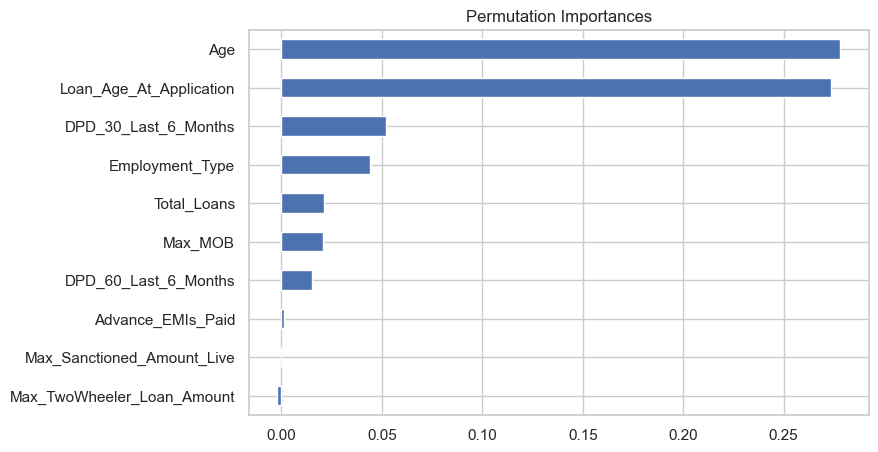

In [87]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=42)
importances = pd.Series(result.importances_mean, index=X_top10.columns).sort_values(ascending=False)

importances.plot(kind='barh', title='Permutation Importances', figsize=(8,5))
plt.gca().invert_yaxis()
plt.show()


*The permutation importance plot is a powerful tool for understanding and communicating which variables matter most in your predictive model.*

## Logistic Regression: Hyperparameter Tuning and Model Evaluation - Grid Search

This step applies grid search cross-validation to optimize the logistic regression model using the top 10 most important features, with class imbalance handled via SMOTE. The results and their interpretation are summarized below.

---

### Steps Performed

1. **Feature Selection & Data Preparation**
   - Used the top 10 features identified from previous feature importance analysis.
   - Split the data into training and test sets (80/20 split, stratified by target).

2. **Class Imbalance Handling**
   - Applied SMOTE to the training set only, ensuring balanced classes for model training and preventing data leakage.

3. **Pipeline and Grid Search Setup**
   - Constructed a pipeline with `StandardScaler` and `LogisticRegression`.
   - Defined a parameter grid for regularization strength (`C`), penalty (`l2`), and solver (`liblinear`).
   - Performed 5-fold cross-validation for each parameter combination (25 fits in total).

4. **Model Selection and Evaluation**
   - Selected the best model based on ROC AUC score.
   - Evaluated the model on the (imbalanced) test set using ROC AUC, Gini coefficient, and KS statistic.

---

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Use top 10 features again
X_top10 = df_encoded[top_10_features]
y = df_encoded['Loan_Default']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top10, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Grid Search setup
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear']
}

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_bal, y_train_bal)

# Best model from Grid Search
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
# Gini
gini = 2 * auc - 1

# KS Statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_stat = max(tpr - fpr)

# Print metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"ROC AUC Score: {auc:.4f}")
print(f"Gini Coefficient: {gini:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
ROC AUC Score: 0.7782
Gini Coefficient: 0.5563
KS Statistic: 0.4674


### Results

| Metric                | Value    |
|-----------------------|----------|
| **Best Parameters**   | {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} |
| **ROC AUC Score**     | 0.7782   |
| **Gini Coefficient**  | 0.5563   |
| **KS Statistic**      | 0.4674   |

---

#### Metric Interpretations

- **ROC AUC Score (0.7782):**  
  Indicates strong model discrimination between default and non-default classes. A value closer to 1.0 reflects better performance.

- **Gini Coefficient (0.5563):**  
  A widely used metric in credit risk modeling, calculated as \( 2 \times \text{AUC} - 1 \). This value demonstrates good discriminatory power.

- **KS Statistic (0.4674):**  
  The Kolmogorov-Smirnov statistic measures the maximum separation between the cumulative distributions of the two classes. A value above 0.4 is generally considered strong in credit risk applications.

---

### Summary

- The logistic regression model, after hyperparameter tuning, demonstrates robust predictive performance.
- The selected regularization (C=0.1, l2 penalty) and solver (liblinear) provide the best balance between bias and variance for this dataset.
- All key metrics (AUC, Gini, KS) indicate the model is well-calibrated and effective for distinguishing between loan defaults and non-defaults.

---

## Model Evaluation: ROC Curve and KS Plot

This step visualizes the performance of your best logistic regression model using two key diagnostic plots: the ROC curve and the KS plot. These plots provide a comprehensive view of the model's ability to distinguish between defaulted and non-defaulted loans.

---

### 1. ROC Curve (Receiver Operating Characteristic)

- **Purpose:**  
  The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across different classification thresholds.
- **AUC (Area Under Curve):**  
  The AUC value (displayed in the legend) quantifies the model's overall ability to discriminate between the two classes. A value closer to 1.0 indicates excellent discrimination.

---

### 2. KS Plot (Kolmogorov-Smirnov Statistic)

- **Purpose:**  
  The KS plot shows the cumulative distribution of the true positive rate (TPR) and false positive rate (FPR) as the classification threshold varies.
- **KS Statistic:**  
  The maximum vertical distance between the TPR and FPR curves is the KS statistic, a widely used metric in credit risk modeling. A higher KS value indicates better separation between the classes.
- **Threshold:**  
  The vertical dashed line marks the threshold at which the KS statistic is maximized.

---

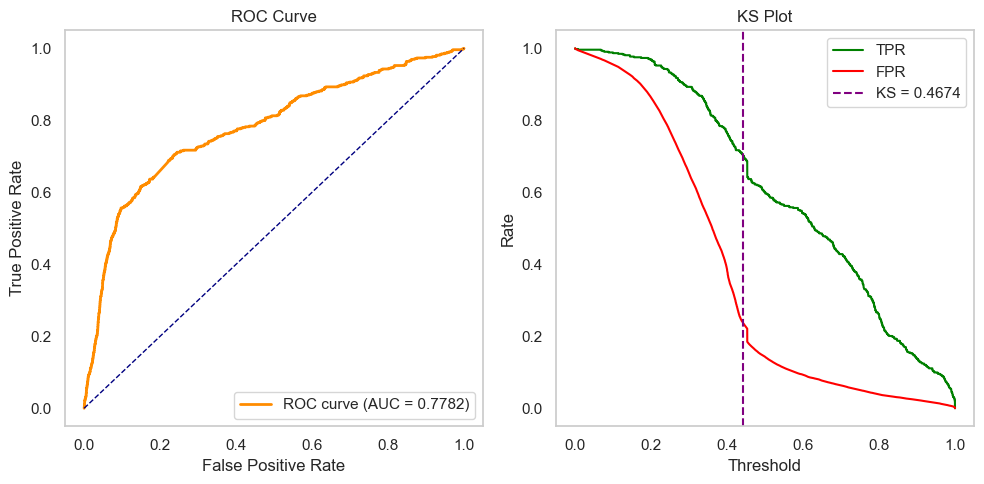

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd

# Get predicted probabilities from best model
y_pred_proba_grid = best_grid.predict_proba(X_test)[:, 1]

# -------------------- ROC Curve --------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# -------------------- KS Plot --------------------
tpr_ks = tpr
fpr_ks = fpr
ks_stat = max(tpr_ks - fpr_ks)
ks_thresh = thresholds[np.argmax(tpr_ks - fpr_ks)]

plt.subplot(1, 2, 2)
plt.plot(thresholds, tpr_ks, label='TPR', color='green')
plt.plot(thresholds, fpr_ks, label='FPR', color='red')
plt.axvline(x=ks_thresh, color='purple', linestyle='--', label=f'KS = {ks_stat:.4f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('KS Plot')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()


### How to Interpret the Plots

- **ROC Curve:**
  - The closer the curve follows the top-left border, the better the model.
  - The diagonal line represents random guessing; your model's curve should be well above this line.
- **KS Plot:**
  - The greater the separation between the TPR and FPR curves, the better.
  - The KS statistic is a direct measure of this separation and is often used to select an optimal threshold for classification.

---

### Why These Plots Matter

- **Model Validation:**  
  Both plots are standard tools for validating classification models, especially in financial and credit risk applications.
- **Threshold Selection:**  
  The KS plot helps in choosing a threshold that maximizes the model's discriminatory power.
- **Business Communication:**  
  These visualizations are effective for communicating model performance to both technical and non-technical stakeholders.

---

*Reviewing these plots to confirm that our model is effectively distinguishing between defaulted and non-defaulted loans, and to select an appropriate threshold for operational use.*

## Random Forest Model: Performance Evaluation

This step introduces a Random Forest classifier trained on the top 10 most important features, using the same balanced training data as the logistic regression benchmark. The results are compared directly to the previously tuned logistic regression model.

---

### Steps Performed

1. **Feature Selection**
   - Used the same top 10 features identified by Gini drop analysis:
     - DPD_30_Last_6_Months
     - Advance_EMIs_Paid
     - Age
     - Loan_Age_At_Application
     - Max_Sanctioned_Amount_Live
     - Total_Loans
     - Max_MOB
     - Max_TwoWheeler_Loan_Amount
     - Employment_Type
     - DPD_60_Last_6_Months

2. **Model Training**
   - Trained a Random Forest classifier with:
     - 100 trees (`n_estimators=100`)
     - Maximum tree depth of 8 (`max_depth=8`)
     - All other parameters at default
   - Model was fit on the SMOTE-balanced training set.

3. **Model Evaluation**
   - Predictions were made on the (imbalanced) test set.
   - Key metrics were calculated:
     - **ROC AUC Score**
     - **Gini Coefficient**
     - **KS Statistic**
   - Results are compared to the logistic regression benchmark.

---

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Step 1: Select top 10 features
top_10_features = drop_df.sort_values(by='Gini_Drop', ascending=False)['Feature'].head(10).tolist()
print("🧠 Top 10 features used for modeling:", top_10_features)

X_train_top10 = X_train_bal[top_10_features]
X_test_top10 = X_test[top_10_features]

# Step 2: Train Random Forest (no tuning)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_top10, y_train_bal)
y_pred_proba_rf = rf.predict_proba(X_test_top10)[:, 1]

# Step 3: Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
gini_rf = 2 * roc_auc - 1

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
ks_stat = max(tpr - fpr)

# Output
print(f"🌲 Random Forest Model")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"Gini Coefficient: {gini_rf:.4f}")
print(f"🔍 Logistic Regression Gini: {gini_top10_logreg:.4f}  - Previous BenchMark")


🧠 Top 10 features used for modeling: ['DPD_30_Last_6_Months', 'Advance_EMIs_Paid', 'Age', 'Loan_Age_At_Application', 'Max_Sanctioned_Amount_Live', 'Total_Loans', 'Max_MOB', 'Max_TwoWheeler_Loan_Amount', 'Employment_Type', 'DPD_60_Last_6_Months']
🌲 Random Forest Model
ROC AUC Score: 0.7905
KS Statistic: 0.4859
Gini Coefficient: 0.5810
🔍 Logistic Regression Gini: 0.5568  - Previous BenchMark


### Results

| Metric                | Random Forest | Logistic Regression (Benchmark) |
|-----------------------|---------------|---------------------------------|
| **ROC AUC Score**     | 0.7905        | 0.7782                          |
| **Gini Coefficient**  | 0.5810        | 0.5568                          |
| **KS Statistic**      | 0.4859        | 0.4674                          |

---

#### Metric Interpretations

- **ROC AUC Score (0.7905):**  
  Indicates the Random Forest model has strong discriminatory power, slightly outperforming logistic regression.

- **Gini Coefficient (0.5810):**  
  Higher than the logistic regression benchmark, showing improved model separation between default and non-default classes.

- **KS Statistic (0.4859):**  
  Also higher than the logistic regression model, suggesting better class separation.

---

### Summary

- The Random Forest model, even without hyperparameter tuning, outperforms the previously tuned logistic regression model on all key metrics.
- Both models use the same top 10 features and balanced training data, ensuring a fair comparison.
- These results suggest that tree-based models may capture more complex relationships in the data, leading to better predictive performance.

---

## XGBoost Model: Performance Evaluation

This step introduces an XGBoost classifier trained on the same top 10 most important features, using the SMOTE-balanced training data. The results are compared directly to the previously tuned logistic regression and random forest models.

---

### Steps Performed

1. **Feature Selection**
   - Used the same top 10 features identified by Gini drop analysis:
     - DPD_30_Last_6_Months
     - Advance_EMIs_Paid
     - Age
     - Loan_Age_At_Application
     - Max_Sanctioned_Amount_Live
     - Total_Loans
     - Max_MOB
     - Max_TwoWheeler_Loan_Amount
     - Employment_Type
     - DPD_60_Last_6_Months

2. **Model Training**
   - Trained an XGBoost classifier with:
     - 100 trees (`n_estimators=100`)
     - Maximum tree depth of 6 (`max_depth=6`)
     - Learning rate of 0.1
     - All other parameters at default
   - Model was fit on the SMOTE-balanced training set.

3. **Model Evaluation**
   - Predictions were made on the (imbalanced) test set.
   - Key metrics were calculated:
     - **ROC AUC Score**
     - **Gini Coefficient**
     - **KS Statistic**
   - Results are compared to the logistic regression and random forest benchmarks.

---

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Step 1: Use the same top 10 features
top_10_features = drop_df.sort_values(by='Gini_Drop', ascending=False)['Feature'].head(10).tolist()
print("🧠 Top 10 features used for modeling:", top_10_features)

X_train_top10 = X_train_bal[top_10_features]
X_test_top10 = X_test[top_10_features]

# Step 2: Train XGBoost (no tuning)
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train_top10, y_train_bal)

# Step 3: Predictions and Metrics
y_pred_proba_xgb = xgb.predict_proba(X_test_top10)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
gini_xgb = 2 * roc_auc - 1

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
ks_stat = max(tpr - fpr)

# Output
print(f"⚡️ XGBoost Model")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"Gini Coefficient: {gini_xgb:.4f}")
print(f"🔍 Previous Logistic Gini: {gini_top10_logreg:.4f}")
print(f"🌲 Previous RF Gini: {gini_rf:.4f}")


🧠 Top 10 features used for modeling: ['DPD_30_Last_6_Months', 'Advance_EMIs_Paid', 'Age', 'Loan_Age_At_Application', 'Max_Sanctioned_Amount_Live', 'Total_Loans', 'Max_MOB', 'Max_TwoWheeler_Loan_Amount', 'Employment_Type', 'DPD_60_Last_6_Months']
⚡️ XGBoost Model
ROC AUC Score: 0.7724
KS Statistic: 0.4508
Gini Coefficient: 0.5448
🔍 Previous Logistic Gini: 0.5568
🌲 Previous RF Gini: 0.5810


### Results

| Metric                | XGBoost   | Random Forest | Logistic Regression |
|-----------------------|-----------|---------------|--------------------|
| **ROC AUC Score**     | 0.7724    | 0.7905        | 0.7782             |
| **Gini Coefficient**  | 0.5448    | 0.5810        | 0.5568             |
| **KS Statistic**      | 0.4508    | 0.4859        | 0.4674             |

---

#### Metric Interpretations

- **ROC AUC Score (0.7724):**  
  Indicates strong model discrimination, though slightly lower than both random forest and logistic regression in this setup.

- **Gini Coefficient (0.5448):**  
  Reflects good discriminatory power, but is outperformed by both random forest and logistic regression in this comparison.

- **KS Statistic (0.4508):**  
  Shows solid class separation, though again slightly lower than the other two models.

---

### Summary

- The XGBoost model, without hyperparameter tuning, performs competitively but does not surpass the random forest or logistic regression models on this dataset and feature set.
- All models use the same top 10 features and balanced training data, ensuring a fair comparison.
- These results highlight the importance of model selection and tuning, as different algorithms may perform better depending on the data and problem context.

---

## Decision Tree Model: Performance Evaluation

This step evaluates a basic Decision Tree classifier trained on the top 10 most important features, using the same SMOTE-balanced training data as previous models. The results are compared directly to logistic regression, random forest, and XGBoost benchmarks.

---

### Steps Performed

1. **Feature Selection**
   - Used the same top 10 features identified by Gini drop analysis:
     - DPD_30_Last_6_Months
     - Advance_EMIs_Paid
     - Age
     - Loan_Age_At_Application
     - Max_Sanctioned_Amount_Live
     - Total_Loans
     - Max_MOB
     - Max_TwoWheeler_Loan_Amount
     - Employment_Type
     - DPD_60_Last_6_Months

2. **Model Training**
   - Trained a Decision Tree classifier with:
     - Maximum depth of 6 (`max_depth=6`) to control overfitting
     - Minimum samples per leaf set to 50 (`min_samples_leaf=50`)
     - All other parameters at default
   - Model was fit on the SMOTE-balanced training set.

3. **Model Evaluation**
   - Predictions were made on the (imbalanced) test set.
   - Key metrics were calculated:
     - **ROC AUC Score**
     - **Gini Coefficient**
     - **KS Statistic**
   - Results are compared to logistic regression, random forest, and XGBoost benchmarks.

---

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Step 1: Use the same top 10 features
top_10_features = drop_df.sort_values(by='Gini_Drop', ascending=False)['Feature'].head(10).tolist()
print("🧠 Top 10 features used for modeling:", top_10_features)

X_train_top10 = X_train_bal[top_10_features]
X_test_top10 = X_test[top_10_features]

# Step 2: Train Decision Tree (basic, no tuning)
dt = DecisionTreeClassifier(
    max_depth=6,  # controlling depth to avoid overfitting
    min_samples_leaf=50,
    random_state=42
)
dt.fit(X_train_top10, y_train_bal)
y_pred_proba_dt = dt.predict_proba(X_test_top10)[:, 1]

# Step 3: Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
gini_dt = 2 * roc_auc - 1

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
ks_stat = max(tpr - fpr)

# Output
print(f"🌳 Decision Tree Model")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"Gini Coefficient: {gini_dt:.4f}")
print(f"🔍 Previous Logistic Gini: {gini_top10_logreg:.4f}")
print(f"🌲 Previous RF Gini: {gini_rf:.4f}")
print(f"⚡️ Previous XGB Gini: {gini_xgb:.4f}")


🧠 Top 10 features used for modeling: ['DPD_30_Last_6_Months', 'Advance_EMIs_Paid', 'Age', 'Loan_Age_At_Application', 'Max_Sanctioned_Amount_Live', 'Total_Loans', 'Max_MOB', 'Max_TwoWheeler_Loan_Amount', 'Employment_Type', 'DPD_60_Last_6_Months']
🌳 Decision Tree Model
ROC AUC Score: 0.7769
KS Statistic: 0.4526
Gini Coefficient: 0.5538
🔍 Previous Logistic Gini: 0.5568
🌲 Previous RF Gini: 0.5810
⚡️ Previous XGB Gini: 0.5448


### Results

| Metric                | Decision Tree | Random Forest | XGBoost   | Logistic Regression |
|-----------------------|---------------|--------------|-----------|--------------------|
| **ROC AUC Score**     | 0.7769        | 0.7905       | 0.7724    | 0.7782             |
| **Gini Coefficient**  | 0.5538        | 0.5810       | 0.5448    | 0.5568             |
| **KS Statistic**      | 0.4526        | 0.4859       | 0.4508    | 0.4674             |

---

#### Metric Interpretations

- **ROC AUC Score (0.7769):**  
  The decision tree model demonstrates strong discriminatory power, comparable to logistic regression and XGBoost, but slightly below random forest.

- **Gini Coefficient (0.5538):**  
  Indicates good model separation between default and non-default classes, on par with logistic regression and XGBoost.

- **KS Statistic (0.4526):**  
  Shows solid class separation, again comparable to other models.

---

### Summary

- The Decision Tree model, even with basic settings and no hyperparameter tuning, performs competitively with logistic regression and XGBoost, but is outperformed by the random forest model on all key metrics.
- All models use the same top 10 features and balanced training data, ensuring a fair comparison.
- These results highlight that while single decision trees are interpretable and easy to visualize, ensemble methods like random forest can capture more complex relationships and often yield better predictive performance.

---

## GAM Model: Performance Evaluation

In [116]:
%pip install pygam

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
from pygam import LogisticGAM, s
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Select top 10 features
top_10_features = drop_df.sort_values(by='Gini_Drop', ascending=False)['Feature'].head(10).tolist()
print("🧠 Top 10 features used for modeling:", top_10_features)

X_train_top10 = X_train_bal[top_10_features].copy()
X_test_top10 = X_test[top_10_features].copy()

# Step 2: Encode categorical variables (force dense)
for col in X_train_top10.columns:
    if X_train_top10[col].dtype == 'object' or str(X_train_top10[col].dtype).startswith('category'):
        le = LabelEncoder()
        X_train_top10[col] = le.fit_transform(X_train_top10[col].astype(str))
        X_test_top10[col] = le.transform(X_test_top10[col].astype(str))

# Step 3: Convert to guaranteed dense NumPy arrays
X_train_np = X_train_top10.values.astype(np.float64)
X_test_np = X_test_top10.values.astype(np.float64)
y_train_np = np.array(y_train_bal, dtype=np.float64)
y_test_np = np.array(y_test, dtype=np.float64)

# Step 4: Define GAM terms correctly
terms = s(0)
for i in range(1, X_train_np.shape[1]):
    terms += s(i)

# Step 5: Train the GAM
gam = LogisticGAM(terms=terms, fit_intercept=True, verbose=True).fit(X_train_np, y_train_np)
y_pred_proba_gam = gam.predict_proba(X_test_np)

# Step 6: Evaluate
roc_auc = roc_auc_score(y_test_np, y_pred_proba_gam)
gini_gam = 2 * roc_auc - 1
fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba_gam)
ks_stat = max(tpr - fpr)

# Step 7: Output results
print("🎯 GAM Model")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"Gini Coefficient: {gini_gam:.4f}")
print(f"🔍 Previous Logistic Gini: {gini_top10_logreg:.4f}")
print(f"🌲 Previous RF Gini: {gini_rf:.4f}")
print(f"⚡️ Previous XGB Gini: {gini_xgb:.4f}")
print(f"🌳 Previous DT Gini: {gini_dt:.4f}")


🧠 Top 10 features used for modeling: ['DPD_30_Last_6_Months', 'Advance_EMIs_Paid', 'Age', 'Loan_Age_At_Application', 'Max_Sanctioned_Amount_Live', 'Total_Loans', 'Max_MOB', 'Max_TwoWheeler_Loan_Amount', 'Employment_Type', 'DPD_60_Last_6_Months']


AttributeError: 'csr_matrix' object has no attribute 'A'